In [38]:
from octopus.db import PostgresqlManager
from dotenv import load_dotenv

import networkx as nx
import matplotlib.pyplot as plt

In [23]:
# general rule is getting edge-wise data and add them as node w/ node types and edge_types

In [24]:
G = nx.Graph()

In [25]:
load_dotenv("/Users/syyun/Dropbox (MIT)/efd/.envlv", override=True)
pm = PostgresqlManager(dotenv_path="/Users/syyun/Dropbox (MIT)/efd/.envlv")

In [27]:
# prep bioguide_ids
df = pm.execute_sql(fetchall=True, sql=
                f"""
                select * from _sandbox_suyeol.senator_bioguide
                """
                )
bio = {}
for f, l, b in df:
    bio[b] = {'type': 'senator', 'f': f, 'l': l}
bio

{'C001095': {'type': 'senator', 'f': 'TOM ', 'l': 'COTTON'},
 'Y000064': {'type': 'senator', 'f': 'Todd', 'l': 'Young'},
 'S001203': {'type': 'senator', 'f': 'Tina', 'l': 'Smith'},
 'S001184': {'type': 'senator', 'f': 'TIM', 'l': 'SCOTT'},
 'B001230': {'type': 'senator', 'f': 'TAMMY ', 'l': 'BALDWIN'},
 'D000622': {'type': 'senator', 'f': 'Ladda Tammy', 'l': 'Duckworth'},
 'D000618': {'type': 'senator', 'f': 'Steve', 'l': 'Daines'},
 'B000944': {'type': 'senator', 'f': 'SHERROD', 'l': 'BROWN'},
 'W000802': {'type': 'senator', 'f': 'SHELDON', 'l': 'WHITEHOUSE'},
 'B000575': {'type': 'senator', 'f': 'Roy', 'l': 'Blunt'},
 'J000293': {'type': 'senator', 'f': 'RON ', 'l': 'JOHNSON'},
 'W000779': {'type': 'senator', 'f': 'Ron L', 'l': 'Wyden'},
 'S001217': {'type': 'senator', 'f': 'Rick', 'l': 'Scott'},
 'W000790': {'type': 'senator', 'f': 'Raphael', 'l': 'Warnock'},
 'P000603': {'type': 'senator', 'f': 'RAND ', 'l': 'PAUL'},
 'M001111': {'type': 'senator', 'f': 'PATTY L', 'l': 'MURRAY'},
 

In [28]:
# prep tickers w/ naics code
df = pm.execute_sql(fetchall=True, sql=
                f"""
                select ticker, naics1 from _sandbox_suyeol.ticker_naics tn
                    inner join _sandbox_suyeol.ticker_naics_url tnu on tnu.naics_url = tn.naics_url
                """
                )
ticker = {}
for t, n in df:
    ticker[t] = {'type': 'ticker', 'naics1': n}
ticker

{'GAOSX': {'type': 'ticker', 'naics1': '522110'},
 'IARYX': {'type': 'ticker', 'naics1': '523940'},
 'CVX': {'type': 'ticker', 'naics1': '324110'},
 'FRMZX': {'type': 'ticker', 'naics1': '523999'},
 'VTINX': {'type': 'ticker', 'naics1': '525910'},
 'LYV': {'type': 'ticker', 'naics1': '561920'},
 'FIVFX': {'type': 'ticker', 'naics1': '524127'},
 'VIAB': {'type': 'ticker', 'naics1': '515210'},
 'KRFT': {'type': 'ticker', 'naics1': '311421'},
 'DNKN': {'type': 'ticker', 'naics1': '445291'},
 'HNI': {'type': 'ticker', 'naics1': '337211'},
 'DVN': {'type': 'ticker', 'naics1': '211120'},
 'SNE': {'type': 'ticker', 'naics1': '334310'},
 'ACGIX': {'type': 'ticker', 'naics1': '523940'},
 'CLNY': {'type': 'ticker', 'naics1': '523920'},
 'DLPH': {'type': 'ticker', 'naics1': '336390'},
 'PRGSX': {'type': 'ticker', 'naics1': '523940'},
 'CARR': {'type': 'ticker', 'naics1': '333415'},
 'CAB': {'type': 'ticker', 'naics1': '451110'},
 'TXN': {'type': 'ticker', 'naics1': '334413'},
 'RYSEX': {'type': '

In [30]:
# get transactions 
year1 = 2021
year2 = 2022
df = pm.execute_sql(fetchall=True, sql=
                f"""
                with union4ab as (
                    select * from _sandbox_suyeol.senate_annual_4a saa 
                    union
                    select * from _sandbox_suyeol.senate_annual_4b sab 
                )
                select distinct sb.bioguide_id, sa.first_name, sa.last_name, ticker, trans_date from union4ab u
                inner join _sandbox_suyeol.senate_annual sa on sa.report_type_url  = u.report_url 
                inner join _sandbox_suyeol.senator_bioguide sb on sb.first_name = sa.first_name and sb.last_name = sa.last_name 
                where (left(trans_date, 4)::int = {year1} or left(trans_date, 4)::int = {year2}) and ticker is not null
                """
                )
df

[('B000575', 'Roy', 'Blunt', 'NRDY', '2021-09-27'),
 ('B001267', 'Michael F', 'Bennet', 'EAERX', '2021-06-22'),
 ('B001267', 'Michael F', 'Bennet', 'EAERX', '2021-12-08'),
 ('B001267', 'Michael F', 'Bennet', 'VTTWX', '2021-01-05'),
 ('B001267', 'Michael F', 'Bennet', 'VTTWX', '2021-02-03'),
 ('B001267', 'Michael F', 'Bennet', 'VTTWX', '2021-03-03'),
 ('B001267', 'Michael F', 'Bennet', 'VTTWX', '2021-04-01'),
 ('B001267', 'Michael F', 'Bennet', 'VTTWX', '2021-05-03'),
 ('B001267', 'Michael F', 'Bennet', 'VTTWX', '2021-06-02'),
 ('B001267', 'Michael F', 'Bennet', 'VTTWX', '2021-07-01'),
 ('B001267', 'Michael F', 'Bennet', 'VTTWX', '2021-08-03'),
 ('B001267', 'Michael F', 'Bennet', 'VTTWX', '2021-09-01'),
 ('B001267', 'Michael F', 'Bennet', 'VTTWX', '2021-10-01'),
 ('B001267', 'Michael F', 'Bennet', 'VTTWX', '2021-11-02'),
 ('B001267', 'Michael F', 'Bennet', 'VTTWX', '2021-12-02'),
 ('B001288', 'Cory A', 'Booker', 'AGOZX', '2021-05-17'),
 ('B001288', 'Cory A', 'Booker', 'AGOZX', '2021-12-

In [31]:
senators = [(row[0], bio[row[0]]) for row in df]
senators

[('B000575', {'type': 'senator', 'f': 'Roy', 'l': 'Blunt'}),
 ('B001267', {'type': 'senator', 'f': 'Michael F', 'l': 'Bennet'}),
 ('B001267', {'type': 'senator', 'f': 'Michael F', 'l': 'Bennet'}),
 ('B001267', {'type': 'senator', 'f': 'Michael F', 'l': 'Bennet'}),
 ('B001267', {'type': 'senator', 'f': 'Michael F', 'l': 'Bennet'}),
 ('B001267', {'type': 'senator', 'f': 'Michael F', 'l': 'Bennet'}),
 ('B001267', {'type': 'senator', 'f': 'Michael F', 'l': 'Bennet'}),
 ('B001267', {'type': 'senator', 'f': 'Michael F', 'l': 'Bennet'}),
 ('B001267', {'type': 'senator', 'f': 'Michael F', 'l': 'Bennet'}),
 ('B001267', {'type': 'senator', 'f': 'Michael F', 'l': 'Bennet'}),
 ('B001267', {'type': 'senator', 'f': 'Michael F', 'l': 'Bennet'}),
 ('B001267', {'type': 'senator', 'f': 'Michael F', 'l': 'Bennet'}),
 ('B001267', {'type': 'senator', 'f': 'Michael F', 'l': 'Bennet'}),
 ('B001267', {'type': 'senator', 'f': 'Michael F', 'l': 'Bennet'}),
 ('B001267', {'type': 'senator', 'f': 'Michael F', 'l':

In [32]:
G.add_nodes_from(senators)
G.nodes

NodeView(('B000575', 'B001267', 'B001288', 'B001310', 'C000141', 'C001035', 'C001047', 'C001088', 'C001095', 'C001113', 'D000618', 'D000622', 'E000295', 'G000359', 'H000273', 'H001042', 'H001061', 'H001089', 'K000383', 'K000384', 'K000393', 'L000571', 'L000575', 'M000355', 'M000934', 'M001111', 'M001153', 'M001198', 'P000449', 'P000595', 'P000603', 'R000605', 'R000615', 'S001194', 'S001197', 'S001198', 'S001203', 'S001217', 'T000250', 'T000461', 'T000476', 'W000779', 'W000790', 'W000802', 'W000805', 'W000817'))

In [33]:
tickers = [(row[3], ticker[row[3]]) if row[3] in ticker.keys() else (row[3], {"type": "ticker", "naics1": None}) for row in df]
tickers

[('NRDY', {'type': 'ticker', 'naics1': None}),
 ('EAERX', {'type': 'ticker', 'naics1': None}),
 ('EAERX', {'type': 'ticker', 'naics1': None}),
 ('VTTWX', {'type': 'ticker', 'naics1': None}),
 ('VTTWX', {'type': 'ticker', 'naics1': None}),
 ('VTTWX', {'type': 'ticker', 'naics1': None}),
 ('VTTWX', {'type': 'ticker', 'naics1': None}),
 ('VTTWX', {'type': 'ticker', 'naics1': None}),
 ('VTTWX', {'type': 'ticker', 'naics1': None}),
 ('VTTWX', {'type': 'ticker', 'naics1': None}),
 ('VTTWX', {'type': 'ticker', 'naics1': None}),
 ('VTTWX', {'type': 'ticker', 'naics1': None}),
 ('VTTWX', {'type': 'ticker', 'naics1': None}),
 ('VTTWX', {'type': 'ticker', 'naics1': None}),
 ('VTTWX', {'type': 'ticker', 'naics1': None}),
 ('AGOZX', {'type': 'ticker', 'naics1': None}),
 ('AGOZX', {'type': 'ticker', 'naics1': None}),
 ('AKRIX', {'type': 'ticker', 'naics1': None}),
 ('AKRIX', {'type': 'ticker', 'naics1': None}),
 ('AKRIX', {'type': 'ticker', 'naics1': None}),
 ('AKRIX', {'type': 'ticker', 'naics1': N

In [34]:
G.add_nodes_from(tickers)
ticker_nodes = [n for n, attrs in G.nodes(data=True) if attrs['type'] == 'ticker']
ticker_nodes

['NRDY',
 'EAERX',
 'VTTWX',
 'AGOZX',
 'AKRIX',
 'BFTIX',
 'BGAIX',
 'BPTIX',
 'FBGRX',
 'FCNTX',
 'FCPGX',
 'FEQIX',
 'FGBRX',
 'FGRIX',
 'FIVFX',
 'FLCOX',
 'FNCMX',
 'FOCPX',
 'FPURX',
 'FSDIX',
 'PRASX',
 'PRGSX',
 'TRBCX',
 'EMCIX',
 'EMVIX',
 'FRVFX',
 'FVFRX',
 'IMCEX',
 'JVAIX',
 'KAUFX',
 'MAGWX',
 'MFEGX',
 'PCOR',
 'PLFDX',
 'PSKCX',
 'RERAX',
 'RIDAX',
 'SAIFX',
 'TADGX',
 'TWVLX',
 'VBIAX',
 'XPGZX',
 'XWDIX',
 'AEGFX',
 'AFIFX',
 'AGG',
 'BGRFX',
 'CVTCX',
 'EMB',
 'GFAFX',
 'HCAIX',
 'HYG',
 'HYLB',
 'IEMG',
 'IGIB',
 'IJH',
 'ITOT',
 'IUSB',
 'IVE',
 'IVV',
 'IVW',
 'IWM',
 'LBSAX',
 'MBB',
 'PDBC',
 'SHV',
 'USMV',
 'VEA',
 'VFH',
 'VIS',
 'VMBS',
 'VO',
 'VWO',
 'XLC',
 'XLK',
 'XLY',
 'GEMIX',
 'SBPYX',
 'VTI',
 'VWSUX',
 'AAPL',
 'AMGN',
 'BLK',
 'C',
 'CSCO',
 'IBM',
 'INTC',
 'JPM',
 'MSFT',
 'NVS',
 'PPG',
 'RDSA',
 'SMFG',
 'T',
 'UBSI',
 'USB',
 'VZ',
 'WFC',
 'BFWFX',
 'BLAFX',
 'CGRYX',
 'CKKRX',
 'CLNCX',
 'CLNRX',
 'CNMRX',
 'CPEIX',
 'DBEF',
 'DGRO',
 'DV

In [35]:
ps_edges = [(row[0], row[3], {'type': 'ps'}) for row in df] # ps = purchase and sales
G.add_edges_from(ps_edges)

ps_edges = [(n1, n2, attrs) for n1, n2, attrs in G.edges(data=True) if attrs['type'] == 'ps'] # this is for print
ps_edges

[('B000575', 'NRDY', {'type': 'ps'}),
 ('B001267', 'EAERX', {'type': 'ps'}),
 ('B001267', 'VTTWX', {'type': 'ps'}),
 ('B001288', 'AGOZX', {'type': 'ps'}),
 ('B001288', 'AKRIX', {'type': 'ps'}),
 ('B001288', 'BFTIX', {'type': 'ps'}),
 ('B001288', 'BGAIX', {'type': 'ps'}),
 ('B001288', 'BPTIX', {'type': 'ps'}),
 ('B001288', 'FBGRX', {'type': 'ps'}),
 ('B001288', 'FCNTX', {'type': 'ps'}),
 ('B001288', 'FCPGX', {'type': 'ps'}),
 ('B001288', 'FEQIX', {'type': 'ps'}),
 ('B001288', 'FGBRX', {'type': 'ps'}),
 ('B001288', 'FGRIX', {'type': 'ps'}),
 ('B001288', 'FIVFX', {'type': 'ps'}),
 ('B001288', 'FLCOX', {'type': 'ps'}),
 ('B001288', 'FNCMX', {'type': 'ps'}),
 ('B001288', 'FOCPX', {'type': 'ps'}),
 ('B001288', 'FPURX', {'type': 'ps'}),
 ('B001288', 'FSDIX', {'type': 'ps'}),
 ('B001288', 'PRASX', {'type': 'ps'}),
 ('B001288', 'PRGSX', {'type': 'ps'}),
 ('B001288', 'TRBCX', {'type': 'ps'}),
 ('B001310', 'EMCIX', {'type': 'ps'}),
 ('B001310', 'EMVIX', {'type': 'ps'}),
 ('B001310', 'FRVFX', {'ty

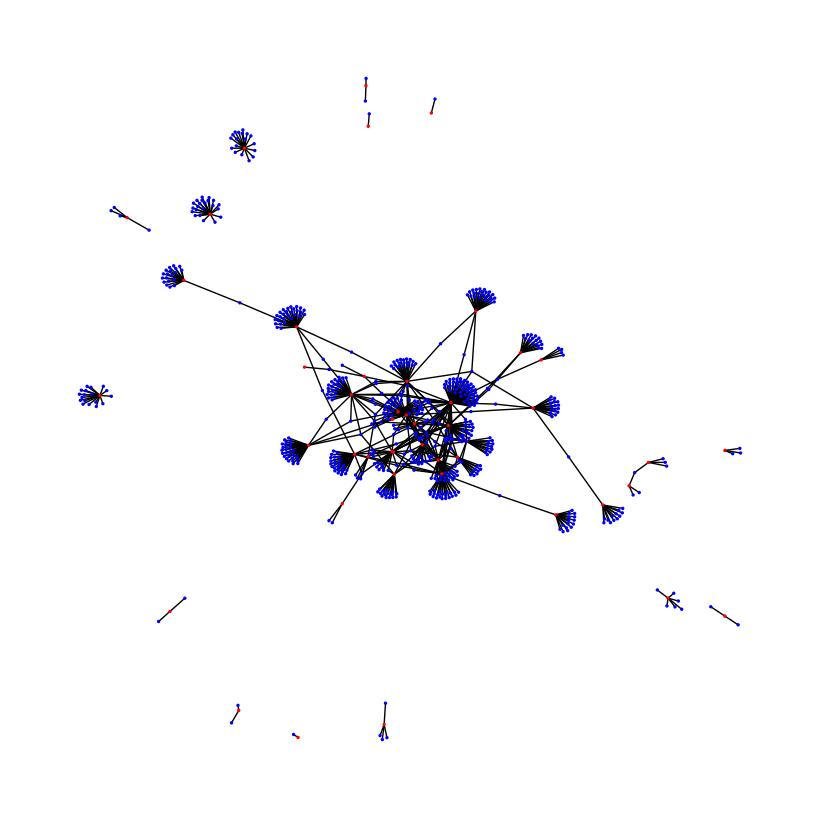

In [39]:
nclr = ['r' if attrs['type'] == 'senator' else 'b' for _, attrs in G.nodes(data=True)]
plt.figure(figsize=(8, 8))
nx.draw(G, node_size=2, node_color=nclr) # senator ticker map

In [47]:
# get committee assignment; committee - senators
cgnum = 117
df = pm.execute_sql(fetchall=True, sql=
                f"""
                select congress_num, committee_thomas_id, legislator_bioguide_id, l.first_name, l.last_name from relational___congress.committees__legislators cl
                                inner join relational___congress.legislators l on l.bioguide_id = cl.legislator_bioguide_id
                where congress_num = {cgnum}
                """
                )
comm = {}
for cg_num, comm_id, senator, f, l in df:
    comm[comm_id] = {'type': 'committee'}
comm

{'HLIG': {'type': 'committee'},
 'HSAG': {'type': 'committee'},
 'HSAP': {'type': 'committee'},
 'HSAS': {'type': 'committee'},
 'HSBA': {'type': 'committee'},
 'HSBU': {'type': 'committee'},
 'HSCN': {'type': 'committee'},
 'HSED': {'type': 'committee'},
 'HSEF': {'type': 'committee'},
 'HSFA': {'type': 'committee'},
 'HSGO': {'type': 'committee'},
 'HSHA': {'type': 'committee'},
 'HSHM': {'type': 'committee'},
 'HSIF': {'type': 'committee'},
 'HSII': {'type': 'committee'},
 'HSIJ': {'type': 'committee'},
 'HSJU': {'type': 'committee'},
 'HSMH': {'type': 'committee'},
 'HSPW': {'type': 'committee'},
 'HSRU': {'type': 'committee'},
 'HSSM': {'type': 'committee'},
 'HSSO': {'type': 'committee'},
 'HSSY': {'type': 'committee'},
 'HSVC': {'type': 'committee'},
 'HSVR': {'type': 'committee'},
 'HSWM': {'type': 'committee'},
 'JCSE': {'type': 'committee'},
 'JSEC': {'type': 'committee'},
 'JSLC': {'type': 'committee'},
 'JSPR': {'type': 'committee'},
 'JSTX': {'type': 'committee'},
 'SCNC':

In [48]:
# senator_nodes = [n for n, attrs in G.nodes(data=True) if attrs['type'] == 'senator'] # no more intersection; just add
committees = [(row[1], comm[row[1]]) for row in df]
committees

[('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HLIG', {'type': 'committee'}),
 ('HSAG', {'type': 'committee'}),
 ('HSAG', {'type': 'committee'}),
 ('HSAG', {'type': 'committee'}),
 ('HSAG', {'type': 'committee'}),
 ('HSAG', {'type': 'committee'}),
 ('HSAG', {'type': 'committee'}),
 ('HSAG', {'type': 'committee'}),
 ('HSAG', {'ty

In [43]:
G.add_nodes_from(committees)

In [50]:
senators_from_committee = [(row[2], {"type": "senator", 'f': row[3], 'l': row[4]}) for row in df]
senators_from_committee

[('S001150', {'type': 'senator', 'f': 'Adam', 'l': 'Schiff'}),
 ('H001047', {'type': 'senator', 'f': 'James', 'l': 'Himes'}),
 ('T000463', {'type': 'senator', 'f': 'Michael', 'l': 'Turner'}),
 ('C001072', {'type': 'senator', 'f': 'André', 'l': 'Carson'}),
 ('W000815', {'type': 'senator', 'f': 'Brad', 'l': 'Wenstrup'}),
 ('S001175', {'type': 'senator', 'f': 'Jackie', 'l': 'Speier'}),
 ('S001192', {'type': 'senator', 'f': 'Chris', 'l': 'Stewart'}),
 ('Q000023', {'type': 'senator', 'f': 'Mike', 'l': 'Quigley'}),
 ('C001087', {'type': 'senator', 'f': 'Eric', 'l': 'Crawford'}),
 ('S001193', {'type': 'senator', 'f': 'Eric', 'l': 'Swalwell'}),
 ('S001196', {'type': 'senator', 'f': 'Elise', 'l': 'Stefanik'}),
 ('C001091', {'type': 'senator', 'f': 'Joaquin', 'l': 'Castro'}),
 ('M001190', {'type': 'senator', 'f': 'Markwayne', 'l': 'Mullin'}),
 ('W000800', {'type': 'senator', 'f': 'Peter', 'l': 'Welch'}),
 ('K000388', {'type': 'senator', 'f': 'Trent', 'l': 'Kelly'}),
 ('M001185', {'type': 'senato

In [51]:
G.add_nodes_from(senators_from_committee)

In [52]:
mmbr_edges = [(row[2], row[1], {'type': 'mmbr'}) for row in df] # ps = purchase and sales
G.add_edges_from(mmbr_edges)

mmbr_edges = [(n1, n2, attrs) for n1, n2, attrs in G.edges(data=True) if attrs['type'] == 'mmbr']
mmbr_edges

[('B000575', 'JSLC', {'type': 'mmbr'}),
 ('B000575', 'JSPR', {'type': 'mmbr'}),
 ('B000575', 'SLIN', {'type': 'mmbr'}),
 ('B000575', 'SSAP', {'type': 'mmbr'}),
 ('B000575', 'SSCM', {'type': 'mmbr'}),
 ('B000575', 'SSRA', {'type': 'mmbr'}),
 ('B000575', 'SSAP01', {'type': 'mmbr'}),
 ('B000575', 'SSAP02', {'type': 'mmbr'}),
 ('B000575', 'SSAP17', {'type': 'mmbr'}),
 ('B000575', 'SSAP18', {'type': 'mmbr'}),
 ('B000575', 'SSAP20', {'type': 'mmbr'}),
 ('B000575', 'SSAP24', {'type': 'mmbr'}),
 ('B000575', 'SSCM33', {'type': 'mmbr'}),
 ('B000575', 'SSCM34', {'type': 'mmbr'}),
 ('B000575', 'SSCM35', {'type': 'mmbr'}),
 ('B000575', 'SSCM38', {'type': 'mmbr'}),
 ('B001267', 'SLIN', {'type': 'mmbr'}),
 ('B001267', 'SSAF', {'type': 'mmbr'}),
 ('B001267', 'SSFI', {'type': 'mmbr'}),
 ('B001267', 'SSAF14', {'type': 'mmbr'}),
 ('B001267', 'SSAF15', {'type': 'mmbr'}),
 ('B001267', 'SSAF16', {'type': 'mmbr'}),
 ('B001267', 'SSFI02', {'type': 'mmbr'}),
 ('B001267', 'SSFI12', {'type': 'mmbr'}),
 ('B001267

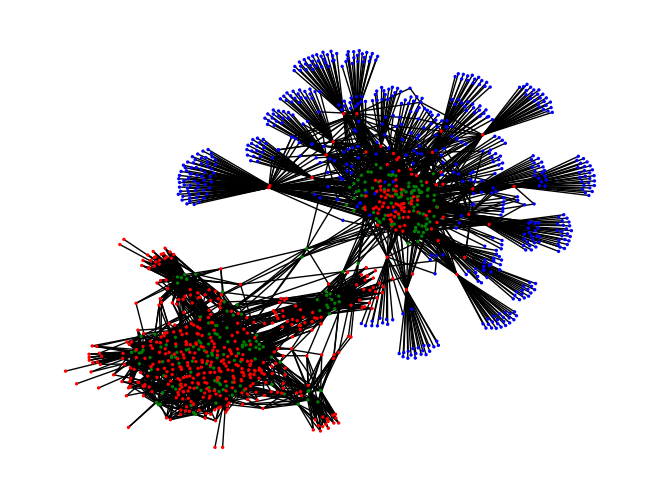

In [53]:
clrmap = {'senator': 'r', 'ticker': 'b', 'committee': 'g'}
nclr = [clrmap[attrs['type']] for _, attrs in G.nodes(data=True)]
plt.figure(figsize=(8, 8))
nx.draw(G, node_size=2, node_color=nclr) # senator ticker committee map

In [62]:
# prep ticker-bill df
cg_num = 117
df = pm.execute_sql(fetchall=True, sql=
                f"""
                with bct as (
                select distinct concat(bill_type, bill_number_chain, '-', congress_num) as bill_id, c.client_name, ticker  from link___lda__congress."_issue_paragraphs__bills" ipb 
                inner join relational___lda.clientships c on c.clientship_id  = ipb.clientship_id 
                inner join "_sandbox_suyeol".client_ticker ct on ct.client_name = c.client_name 
                where congress_num = {cg_num} and ticker != 'Not found'
                )
                , tk as (
                select * from "_sandbox_suyeol".ticker_naics tn 
                inner join "_sandbox_suyeol".ticker_naics_url tnu on tnu.naics_url = tn.naics_url 
                )
                select bct.bill_id, b.short_title, bct.client_name, bct.ticker, tk.naics1, tk.naics1_desc  from bct
                inner join relational___congress.bills b on b.bill_id = bct.bill_id 
                left join tk on tk.ticker = bct.ticker
                """
                )
df

[('hconres11-117',
  None,
  'BIOGEN',
  'BIIB',
  '325414',
  'Biological Product (except Diagnostic) Manufacturing'),
 ('hconres11-117', None, 'COVESTRO LLC', 'COVTY', None, None),
 ('hconres11-117',
  None,
  'CVS HEALTH',
  'CVS',
  '424210',
  "Drugs and Druggists' Sundries Merchant Wholesalers"),
 ('hconres11-117', None, 'NISSAN NORTH AMERICA, INC.', 'NSANY', None, None),
 ('hconres11-117',
  None,
  'PANASONIC CORPORATION OF NORTH AMERICA (PNA)',
  'PCRFY',
  None,
  None),
 ('hconres11-117', None, 'SOUTHWEST AIRLINES', 'LUV', None, None),
 ('hconres11-117', None, 'UNABAIL-RODAMCO-WESTFIELD', 'UNIRF', None, None),
 ('hconres11-117', None, 'UNITED AIRLINES INC', 'UAL', None, None),
 ('hconres20-117', None, 'IHEARTMEDIA INC', 'IHRT', None, None),
 ('hconres20-117',
  None,
  'SALEM COMMUNICATIONS CORPORATION',
  'SALM',
  None,
  None),
 ('hconres33-117', None, 'IHEARTMEDIA INC', 'IHRT', None, None),
 ('hconres33-117', None, 'IHEARTMEDIA, INC.', 'IHRT', None, None),
 ('hconres33-1

In [63]:
bills = [(row[0], {"type": "bill", "short_title": row[1]}) for row in df]
bills

[('hconres11-117', {'type': 'bill', 'short_title': None}),
 ('hconres11-117', {'type': 'bill', 'short_title': None}),
 ('hconres11-117', {'type': 'bill', 'short_title': None}),
 ('hconres11-117', {'type': 'bill', 'short_title': None}),
 ('hconres11-117', {'type': 'bill', 'short_title': None}),
 ('hconres11-117', {'type': 'bill', 'short_title': None}),
 ('hconres11-117', {'type': 'bill', 'short_title': None}),
 ('hconres11-117', {'type': 'bill', 'short_title': None}),
 ('hconres20-117', {'type': 'bill', 'short_title': None}),
 ('hconres20-117', {'type': 'bill', 'short_title': None}),
 ('hconres33-117', {'type': 'bill', 'short_title': None}),
 ('hconres33-117', {'type': 'bill', 'short_title': None}),
 ('hconres33-117', {'type': 'bill', 'short_title': None}),
 ('hconres42-117', {'type': 'bill', 'short_title': None}),
 ('hjres16-117', {'type': 'bill', 'short_title': None}),
 ('hjres34-117', {'type': 'bill', 'short_title': None}),
 ('hjres34-117', {'type': 'bill', 'short_title': None}),
 ('

In [64]:
G.add_nodes_from(bills)

In [68]:
tickers = [(row[3], {"type": "ticker", "naics1": row[4]}) for row in df]
tickers

[('BIIB', {'type': 'ticker', 'naics1': '325414'}),
 ('COVTY', {'type': 'ticker', 'naics1': None}),
 ('CVS', {'type': 'ticker', 'naics1': '424210'}),
 ('NSANY', {'type': 'ticker', 'naics1': None}),
 ('PCRFY', {'type': 'ticker', 'naics1': None}),
 ('LUV', {'type': 'ticker', 'naics1': None}),
 ('UNIRF', {'type': 'ticker', 'naics1': None}),
 ('UAL', {'type': 'ticker', 'naics1': None}),
 ('IHRT', {'type': 'ticker', 'naics1': None}),
 ('SALM', {'type': 'ticker', 'naics1': None}),
 ('IHRT', {'type': 'ticker', 'naics1': None}),
 ('IHRT', {'type': 'ticker', 'naics1': None}),
 ('UNVGY', {'type': 'ticker', 'naics1': None}),
 ('SRCL', {'type': 'ticker', 'naics1': '562211'}),
 ('RTX', {'type': 'ticker', 'naics1': '336412'}),
 ('HON', {'type': 'ticker', 'naics1': '336412'}),
 ('SMNEY', {'type': 'ticker', 'naics1': None}),
 ('ENVA', {'type': 'ticker', 'naics1': None}),
 ('PYPL', {'type': 'ticker', 'naics1': '522320'}),
 ('RTX', {'type': 'ticker', 'naics1': '336412'}),
 ('SIEGY', {'type': 'ticker', 'n

In [69]:
G.add_nodes_from(tickers)

In [70]:
tkbl_edges = [(row[0], row[3], {'type': 'tkbl'}) for row in df] # ps = purchase and sales
tkbl_edges

[('hconres11-117', 'BIIB', {'type': 'tkbl'}),
 ('hconres11-117', 'COVTY', {'type': 'tkbl'}),
 ('hconres11-117', 'CVS', {'type': 'tkbl'}),
 ('hconres11-117', 'NSANY', {'type': 'tkbl'}),
 ('hconres11-117', 'PCRFY', {'type': 'tkbl'}),
 ('hconres11-117', 'LUV', {'type': 'tkbl'}),
 ('hconres11-117', 'UNIRF', {'type': 'tkbl'}),
 ('hconres11-117', 'UAL', {'type': 'tkbl'}),
 ('hconres20-117', 'IHRT', {'type': 'tkbl'}),
 ('hconres20-117', 'SALM', {'type': 'tkbl'}),
 ('hconres33-117', 'IHRT', {'type': 'tkbl'}),
 ('hconres33-117', 'IHRT', {'type': 'tkbl'}),
 ('hconres33-117', 'UNVGY', {'type': 'tkbl'}),
 ('hconres42-117', 'SRCL', {'type': 'tkbl'}),
 ('hjres16-117', 'RTX', {'type': 'tkbl'}),
 ('hjres34-117', 'HON', {'type': 'tkbl'}),
 ('hjres34-117', 'SMNEY', {'type': 'tkbl'}),
 ('hjres35-117', 'ENVA', {'type': 'tkbl'}),
 ('hjres35-117', 'PYPL', {'type': 'tkbl'}),
 ('hr1007-117', 'RTX', {'type': 'tkbl'}),
 ('hr1014-117', 'SIEGY', {'type': 'tkbl'}),
 ('hr1019-117', 'VSTO', {'type': 'tkbl'}),
 ('hr1

In [71]:
G.add_edges_from(tkbl_edges)

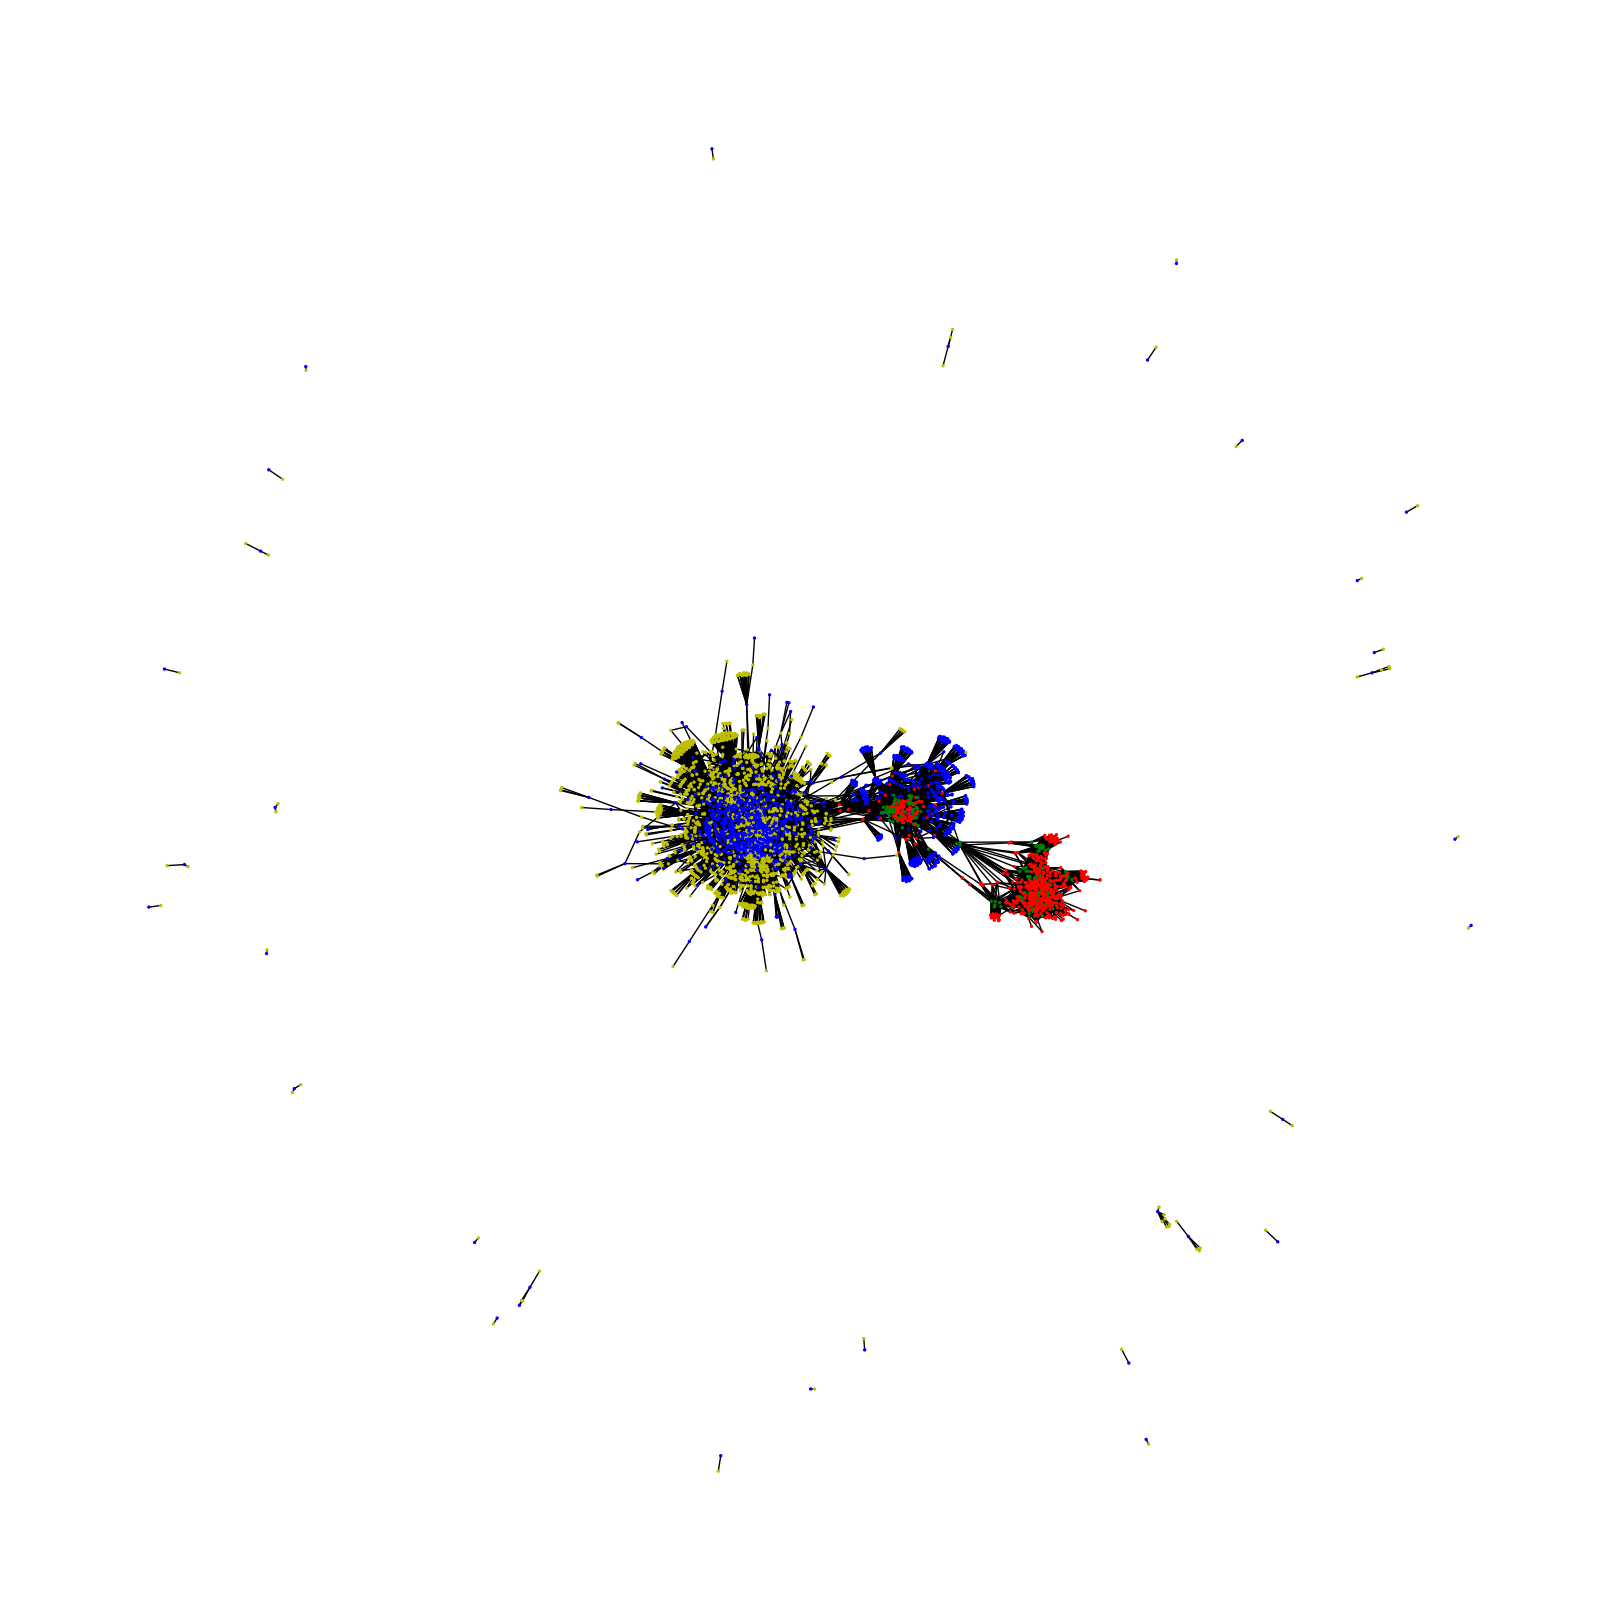

In [73]:
clrmap = {'senator': 'r', 'ticker': 'b', 'committee': 'g', 'bill': 'y'}
nclr = [clrmap[attrs['type']] for _, attrs in G.nodes(data=True)]
plt.figure(figsize=(16, 16))
nx.draw(G, node_size=2, node_color=nclr) # senator ticker committee map

In [78]:
# prep committee-bill
cg_num = 117
df = pm.execute_sql(fetchall=True, sql=
                f"""
                select b.bill_id, b.short_title, committee_id, committee_name from relational___congress.bills__committees bc
                inner join relational___congress.bills b on b.bill_id = bc.bill_id 
                where right(bc.bill_id, 3) = {cg_num}::text
                """)
df

[('hres226-117', None, 'HSJU', 'House Judiciary'),
 ('hres226-117',
  None,
  'HSJU08',
  'Subcommittee on Crime, Terrorism, and Homeland Security'),
 ('hres123-117', None, 'HSIF', 'House Energy and Commerce'),
 ('hres607-117', None, 'HSFA', 'House Foreign Affairs'),
 ('hres304-117', None, 'HSBA', 'House Financial Services'),
 ('hres123-117', None, 'HSIF14', 'Subcommittee on Health'),
 ('hres690-117', None, 'HSIF', 'House Energy and Commerce'),
 ('hres606-117', None, 'HSAS', 'House Armed Services'),
 ('hres556-117', None, 'HSIF', 'House Energy and Commerce'),
 ('hres556-117', None, 'HSIF14', 'Subcommittee on Health'),
 ('hres559-117', None, 'HSFA', 'House Foreign Affairs'),
 ('hres413-117', None, 'HSFA', 'House Foreign Affairs'),
 ('hres17-117', None, 'HSFA', 'House Foreign Affairs'),
 ('hres413-117',
  None,
  'HSFA05',
  'Asia, the Pacific, Central Asia, and Nonproliferation'),
 ('hres559-117',
  None,
  'HSFA05',
  'Asia, the Pacific, Central Asia, and Nonproliferation'),
 ('hres17-

In [79]:
bills = [(row[0], {"type": "bill", "short_title": row[1]}) for row in df]
bills

[('hres226-117', {'type': 'bill', 'short_title': None}),
 ('hres226-117', {'type': 'bill', 'short_title': None}),
 ('hres123-117', {'type': 'bill', 'short_title': None}),
 ('hres607-117', {'type': 'bill', 'short_title': None}),
 ('hres304-117', {'type': 'bill', 'short_title': None}),
 ('hres123-117', {'type': 'bill', 'short_title': None}),
 ('hres690-117', {'type': 'bill', 'short_title': None}),
 ('hres606-117', {'type': 'bill', 'short_title': None}),
 ('hres556-117', {'type': 'bill', 'short_title': None}),
 ('hres556-117', {'type': 'bill', 'short_title': None}),
 ('hres559-117', {'type': 'bill', 'short_title': None}),
 ('hres413-117', {'type': 'bill', 'short_title': None}),
 ('hres17-117', {'type': 'bill', 'short_title': None}),
 ('hres413-117', {'type': 'bill', 'short_title': None}),
 ('hres559-117', {'type': 'bill', 'short_title': None}),
 ('hres17-117', {'type': 'bill', 'short_title': None}),
 ('hres82-117', {'type': 'bill', 'short_title': None}),
 ('hres322-117', {'type': 'bill', 

In [80]:
G.add_nodes_from(bills)

In [81]:
committees = [(row[2], {"type": "committee"}) for row in df]
committees

[('HSJU', {'type': 'committee'}),
 ('HSJU08', {'type': 'committee'}),
 ('HSIF', {'type': 'committee'}),
 ('HSFA', {'type': 'committee'}),
 ('HSBA', {'type': 'committee'}),
 ('HSIF14', {'type': 'committee'}),
 ('HSIF', {'type': 'committee'}),
 ('HSAS', {'type': 'committee'}),
 ('HSIF', {'type': 'committee'}),
 ('HSIF14', {'type': 'committee'}),
 ('HSFA', {'type': 'committee'}),
 ('HSFA', {'type': 'committee'}),
 ('HSFA', {'type': 'committee'}),
 ('HSFA05', {'type': 'committee'}),
 ('HSFA05', {'type': 'committee'}),
 ('HSFA07', {'type': 'committee'}),
 ('HSSO', {'type': 'committee'}),
 ('HSII', {'type': 'committee'}),
 ('HSGO', {'type': 'committee'}),
 ('HSII24', {'type': 'committee'}),
 ('HSFA', {'type': 'committee'}),
 ('HSGO', {'type': 'committee'}),
 ('HSJU', {'type': 'committee'}),
 ('HSIF', {'type': 'committee'}),
 ('HSWM', {'type': 'committee'}),
 ('HSBU', {'type': 'committee'}),
 ('HSGO', {'type': 'committee'}),
 ('HSAS', {'type': 'committee'}),
 ('HSJU', {'type': 'committee'}),


In [82]:
G.add_nodes_from(committees)

In [83]:
bc_edges = [(row[0], row[2], {'type': 'bc'}) for row in df] # bc = bill-committee
bc_edges

[('hres226-117', 'HSJU', {'type': 'bc'}),
 ('hres226-117', 'HSJU08', {'type': 'bc'}),
 ('hres123-117', 'HSIF', {'type': 'bc'}),
 ('hres607-117', 'HSFA', {'type': 'bc'}),
 ('hres304-117', 'HSBA', {'type': 'bc'}),
 ('hres123-117', 'HSIF14', {'type': 'bc'}),
 ('hres690-117', 'HSIF', {'type': 'bc'}),
 ('hres606-117', 'HSAS', {'type': 'bc'}),
 ('hres556-117', 'HSIF', {'type': 'bc'}),
 ('hres556-117', 'HSIF14', {'type': 'bc'}),
 ('hres559-117', 'HSFA', {'type': 'bc'}),
 ('hres413-117', 'HSFA', {'type': 'bc'}),
 ('hres17-117', 'HSFA', {'type': 'bc'}),
 ('hres413-117', 'HSFA05', {'type': 'bc'}),
 ('hres559-117', 'HSFA05', {'type': 'bc'}),
 ('hres17-117', 'HSFA07', {'type': 'bc'}),
 ('hres82-117', 'HSSO', {'type': 'bc'}),
 ('hres322-117', 'HSII', {'type': 'bc'}),
 ('hres114-117', 'HSGO', {'type': 'bc'}),
 ('hres322-117', 'HSII24', {'type': 'bc'}),
 ('hres182-117', 'HSFA', {'type': 'bc'}),
 ('hres18-117', 'HSGO', {'type': 'bc'}),
 ('hres437-117', 'HSJU', {'type': 'bc'}),
 ('hres618-117', 'HSIF',

In [84]:
G.add_edges_from(bc_edges)

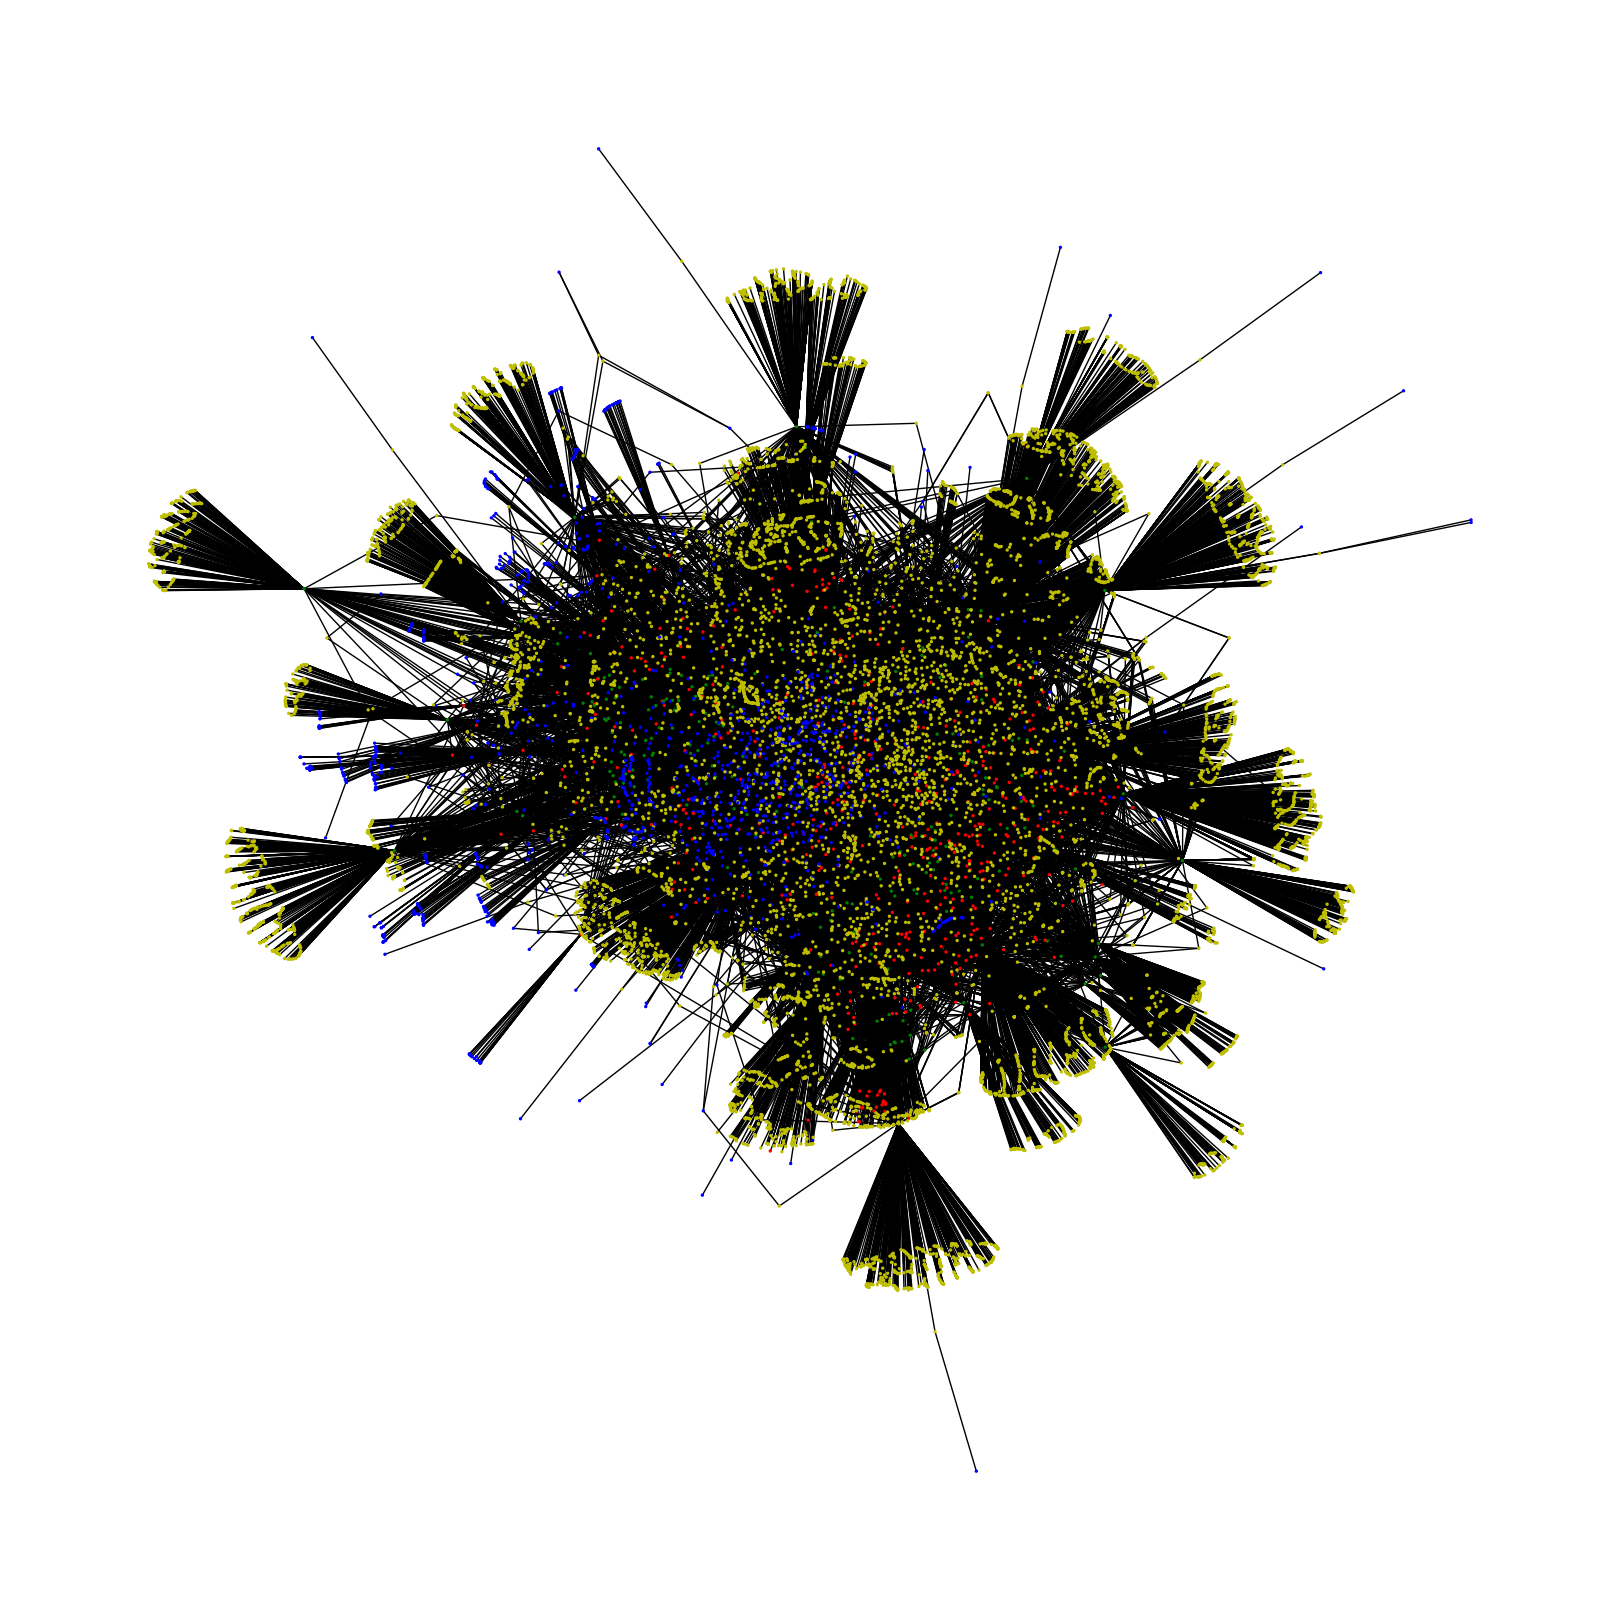

In [85]:
clrmap = {'senator': 'r', 'ticker': 'b', 'committee': 'g', 'bill': 'y'}
nclr = [clrmap[attrs['type']] for _, attrs in G.nodes(data=True)]
plt.figure(figsize=(16, 16))
nx.draw(G, node_size=2, node_color=nclr) # this took long to run

In [86]:
print(G)

Graph with 13070 nodes and 30337 edges


In [113]:
senator = 'W000779'
ticker = 'AMAT'
subg = nx.ego_graph(G, senator, radius=2) #W000779 = Ron Wyden
# subg.nodes

In [114]:
# subg.edges

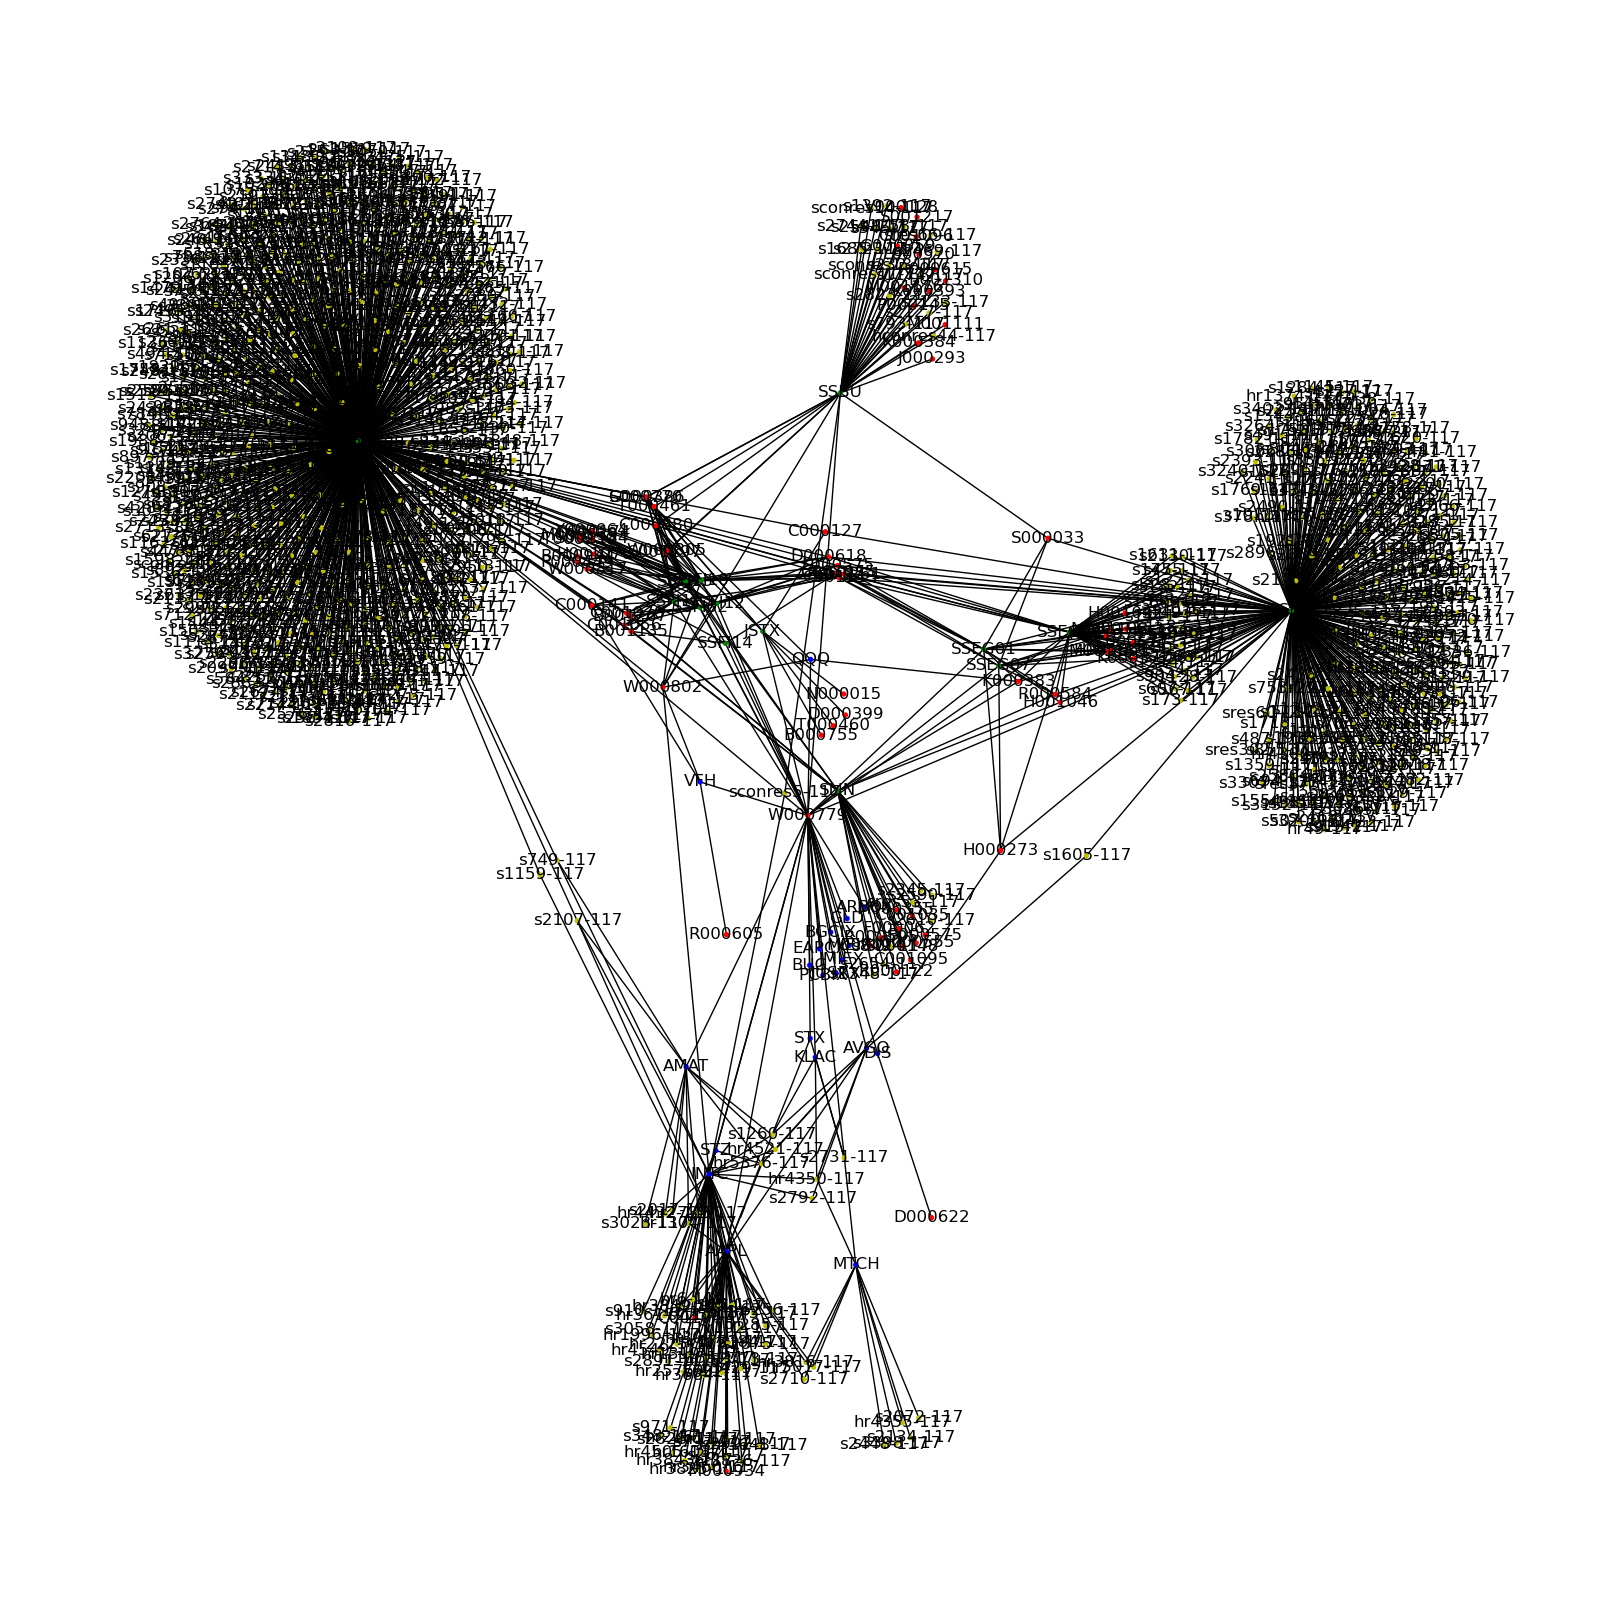

In [116]:
clrmap = {'senator': 'r', 'ticker': 'b', 'committee': 'g', 'bill': 'y'}
nclr = [clrmap[attrs['type']] for _, attrs in subg.nodes(data=True)]
plt.figure(figsize=(16, 16))

pos = nx.spring_layout(subg)

nx.draw(subg, node_size=8, node_color=nclr, with_labels=True) 


# # Add the label to the specified node
# labels = {}
# labels[label_node] = f"Node {label_node}"
# nx.draw_networkx_labels(subg, pos, labels, font_size=12, font_color='r')

# plt.show()

In [138]:
senator = 'W000779'
ticker = 'AMAT'

# Find a shortest path from node 1 to node 5
paths = nx.all_simple_paths(G, source=senator, target=ticker, cutoff=3)

# print the paths
for path in paths:
    print(path)

['W000779', 'AAPL', 'hr1304-117', 'AMAT']
['W000779', 'AAPL', 'hr5376-117', 'AMAT']
['W000779', 'AAPL', 's1260-117', 'AMAT']
['W000779', 'AAPL', 's2107-117', 'AMAT']
['W000779', 'AMAT']
['W000779', 'AVGO', 'hr4521-117', 'AMAT']
['W000779', 'AVGO', 'hr5376-117', 'AMAT']
['W000779', 'AVGO', 's1260-117', 'AMAT']
['W000779', 'INTC', 'hr1304-117', 'AMAT']
['W000779', 'INTC', 'hr2731-117', 'AMAT']
['W000779', 'INTC', 'hr4432-117', 'AMAT']
['W000779', 'INTC', 'hr4521-117', 'AMAT']
['W000779', 'INTC', 'hr5376-117', 'AMAT']
['W000779', 'INTC', 's1260-117', 'AMAT']
['W000779', 'INTC', 's2107-117', 'AMAT']
['W000779', 'INTC', 's749-117', 'AMAT']
['W000779', 'KLAC', 's1260-117', 'AMAT']
['W000779', 'STX', 's1260-117', 'AMAT']
['W000779', 'STZ', 'hr5376-117', 'AMAT']
['W000779', 'SSFI', 's2107-117', 'AMAT']
['W000779', 'SSFI', 's749-117', 'AMAT']


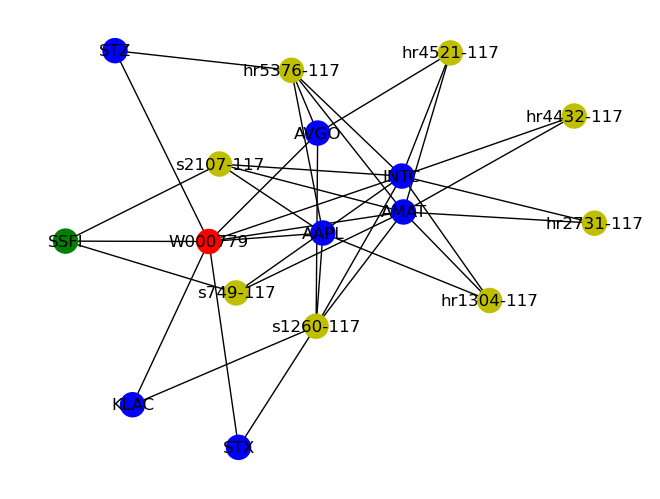

In [146]:
# Find a shortest path from node 1 to node 5
paths = nx.all_simple_paths(G, source=senator, target=ticker, cutoff=3)

# create a new subgraph containing the nodes and edges of the paths
H = G.copy()
nodes_to_remove = set(G.nodes()) - set(sum(paths, []))
H.remove_nodes_from(nodes_to_remove)

# draw the subgraph
clrmap = {'senator': 'r', 'ticker': 'b', 'committee': 'g', 'bill': 'y'}
nclr = [clrmap[attrs['type']] for _, attrs in H.nodes(data=True)]
nx.draw(H, with_labels=True, node_color = nclr)

Graph with 0 nodes and 0 edges
